# Pre-processing

## Data

In [41]:
# Import libraries and modules

# Import the necessary libraries
import sys
import os

# Add the project directory to the sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import everything from lib_import.py, data_exploring.py, data_preprocessing.py 
from lib.lib_import import *
from src.data_preprocessing import *

# Import the data
from data.data_extract import load_data

In [42]:
# Load the data

data = load_data()
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [43]:
# Data (as pandas dataframes)
df = data.copy()
df = fix_target(df)

X = df.iloc[:, :-1] # Features
y = df.iloc[:, -1] #Target
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Education et education-num représentent la même information (la classe d'education de l'individu), on supprime alors le feature "education" pour éviter la duplication de l'information)

In [44]:
# suppression du colonne "education" car elle est redondante avec "education-num"
df.drop("education", axis=1, inplace=True)

## Dataset separation - between train and test

Puisque les données sont déséquilibrés, nous utilisons la méthodes stratify qui nous permet de garantir que toutes les catégories de la variable cible seront présents dans les deux dataframes

In [45]:
df_train, df_test = seperate_train_test(df,random_state=7)
df_train.shape, df_test.shape

((39073, 14), (9769, 14))

In [46]:
# On vérifie l'existence de deux modalités dans le train et le test
print("Le nombre de modalité 0 dans train est: %s" %(df_train['>50K'] == 0).sum())
print("Le nombre de modalité 1 dans train est: %s" %(df_train['>50K'] == 1).sum())

print("Le nombre de modalité 0 dans test est: %s" %(df_test['>50K'] == 0).sum())
print("Le nombre de modalité 1 dans test est: %s" %(df_test['>50K'] == 1).sum())

Le nombre de modalité 0 dans train est: 29724
Le nombre de modalité 1 dans train est: 9349
Le nombre de modalité 0 dans test est: 7431
Le nombre de modalité 1 dans test est: 2338


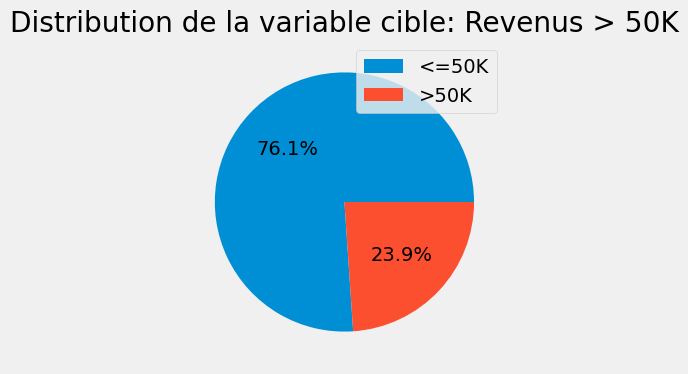

In [47]:
# affichage proportion des modalités pour df_train
plt.figure(figsize=(8, 4))
plt.title("Distribution de la variable cible: Revenus > 50K")
plt.pie(df_train['>50K'].value_counts(), autopct='%1.1f%%')
plt.legend(['<=50K', '>50K'], loc='upper right')
plt.show()

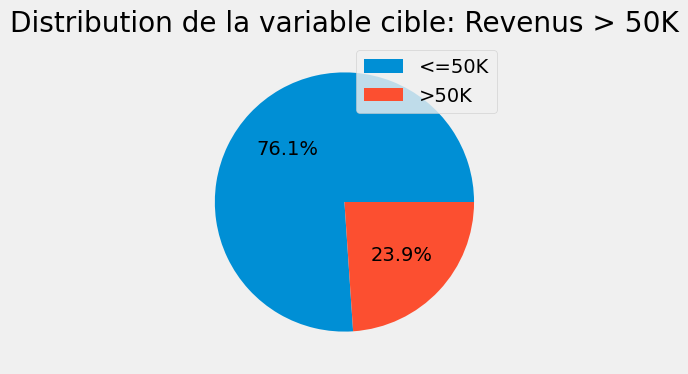

In [48]:
# affichage proportion des modalités pour df_test
plt.figure(figsize=(8, 4))
plt.title("Distribution de la variable cible: Revenus > 50K")
plt.pie(df_test['>50K'].value_counts(), autopct='%1.1f%%')
plt.legend(['<=50K', '>50K'], loc='upper right')
plt.show()

## Numerical & Categorical variables - Casting numerical variables : from int64 to float64

Le déséquilibre des classes dans le jeu de données d'entraînement peut influencer les prédictions du modèle. Je jeu de données contient beaucoup plus d'exemples de la classe 0 que de la classe 1. On a alors un modèle biaisé, il aura tendance à prédire la classe majoritaire (classe 0) plus souvent.

In [49]:
# transformer les types des features "age", capital-gain ,capital-loss ,hours-per-week  en float

df_train[['age', 'capital-gain', 'capital-loss', 'hours-per-week','fnlwgt']] = df_train[['age', 'capital-gain', 'capital-loss', 'hours-per-week','fnlwgt']].astype(float)
df_test[['age', 'capital-gain', 'capital-loss', 'hours-per-week','fnlwgt']] = df_test[['age', 'capital-gain', 'capital-loss', 'hours-per-week','fnlwgt']].astype(float)


In [50]:
df_train.dtypes

age               float64
workclass          object
fnlwgt            float64
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain      float64
capital-loss      float64
hours-per-week    float64
native-country     object
>50K                int64
dtype: object

In [51]:
cont_features = df_train.select_dtypes('float64').columns
cont_features

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [52]:
cat_features = df_train.select_dtypes('object').columns
# ajout de education-num dans cat_features
cat_features = cat_features.append(pd.Index(['education-num']))
cat_features

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')

In [53]:
len(cont_features), len(cat_features)

(5, 8)

## Missing values imputation

In [54]:
df_train = impute_missing_cat_values(df_train, cat_features,"most_frequent")
df_test = impute_missing_cat_values(df_test, cat_features,"most_frequent")

In [55]:
# vérification des valeurs manquantes
df_train.isnull().sum().sort_values(ascending=False)

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
>50K              0
dtype: int64

## Outliers

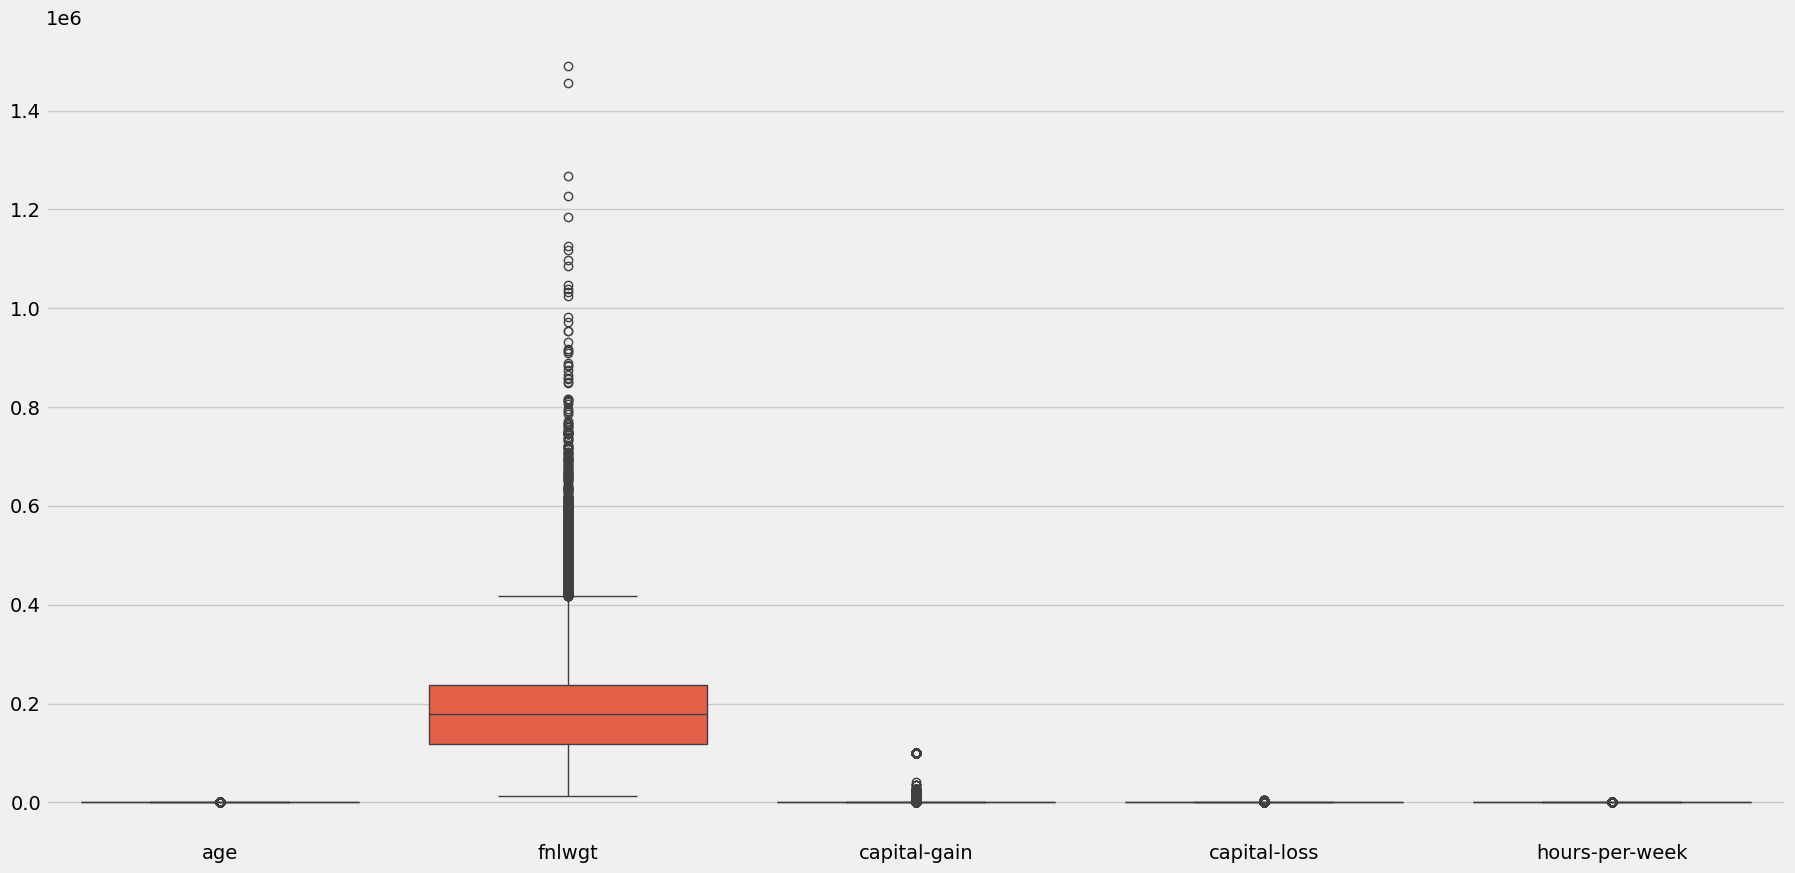

In [56]:
# affichage de boxplot pour les variables continues
plt.figure(figsize=(20,10))
sns.boxplot(data=df_train[cont_features])
plt.show()

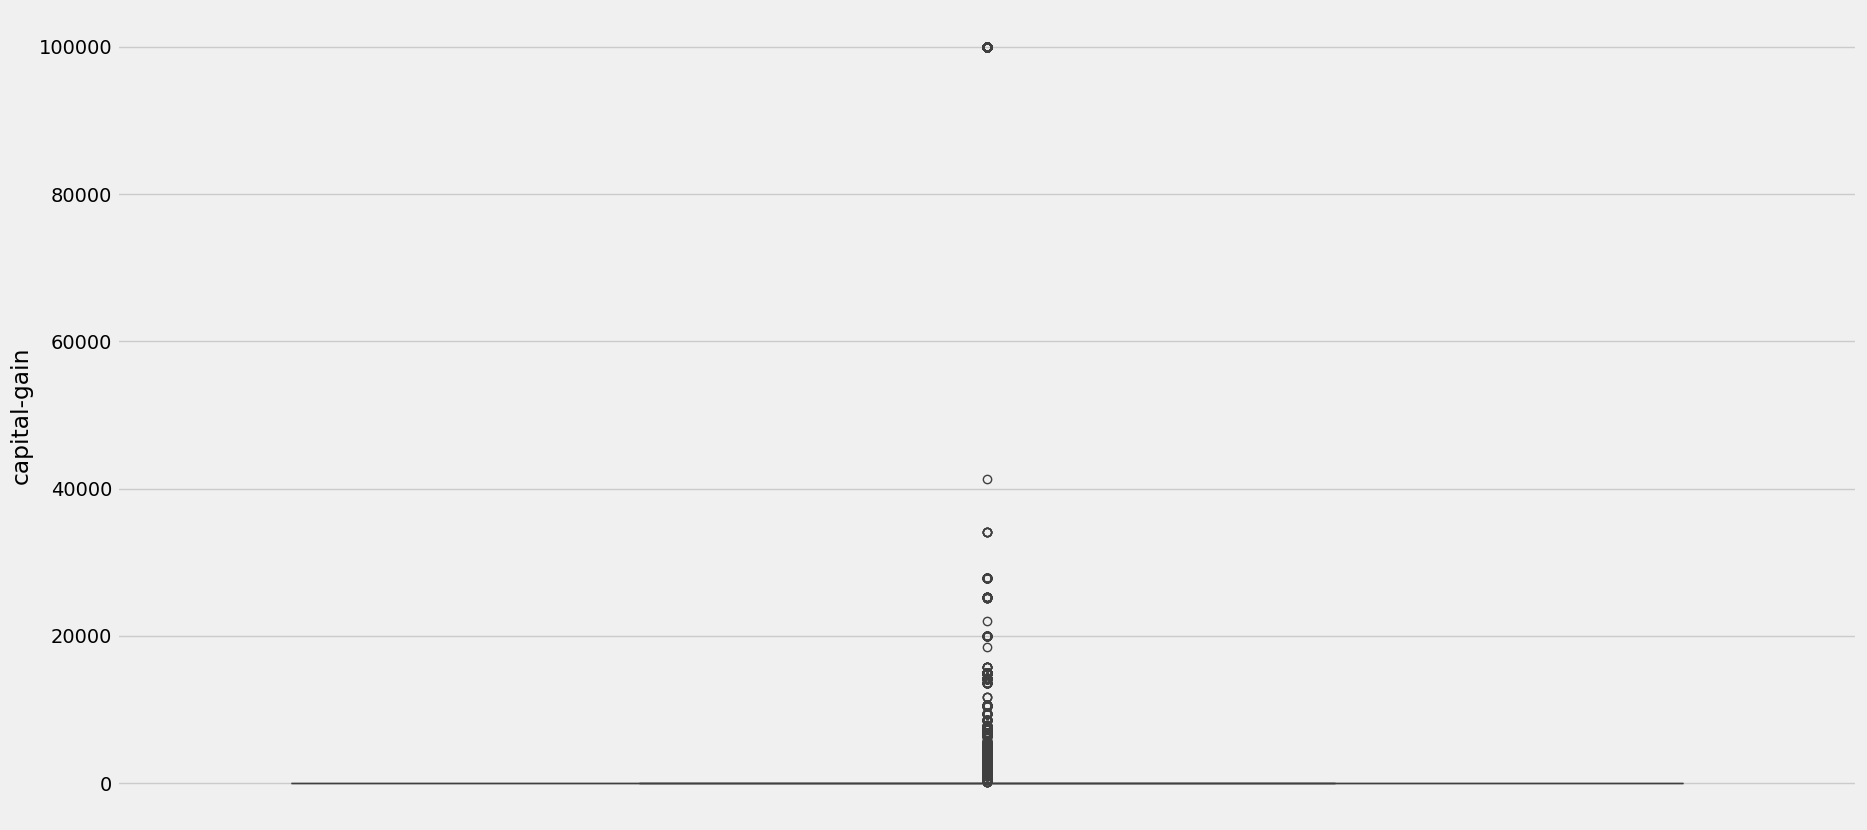

In [57]:
# boxplot pour capital-gain
plt.figure(figsize=(20,10))
sns.boxplot(data=df_train['capital-gain'])
plt.show()

In [58]:
df_train.shape

(39073, 14)

In [59]:
df_test.shape

(9769, 14)

In [60]:
df_train = df_train[df_train['capital-gain'] < 40000.]
df_test = df_test[df_test['capital-gain'] < 40000.]

In [61]:
df_train.shape

(38874, 14)

In [62]:
df_test.shape

(9721, 14)

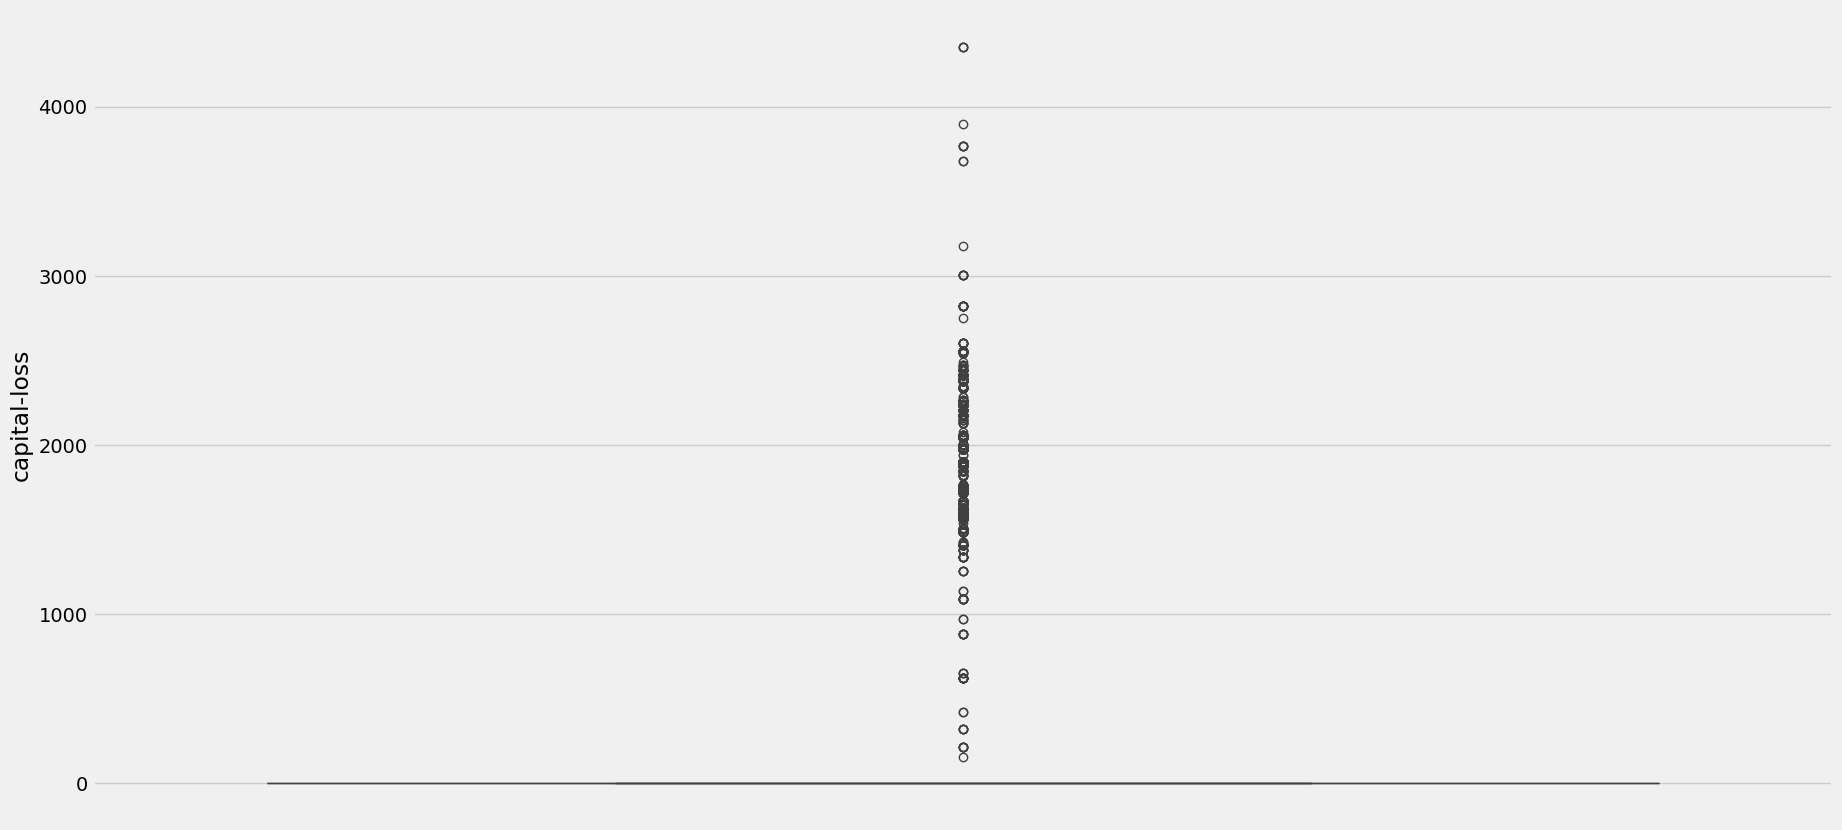

In [63]:
# boxplot pour capital-gain
plt.figure(figsize=(20,10))
sns.boxplot(data=df_train['capital-loss'])
plt.show()

In [64]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


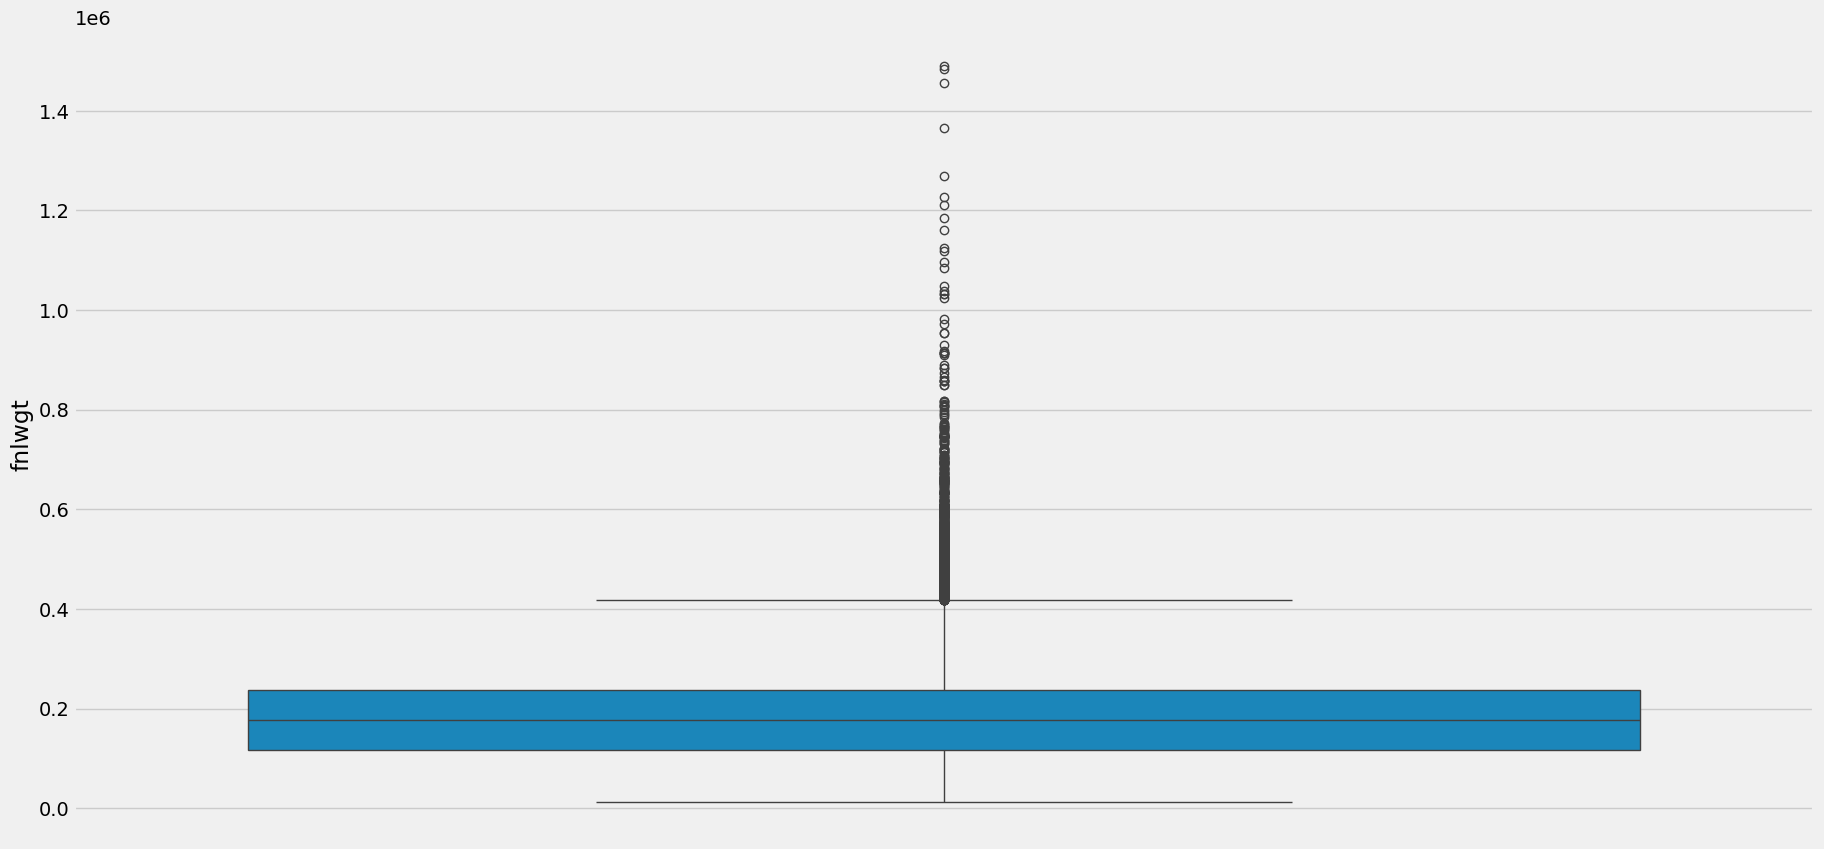

In [65]:
# boxplot pour fnwgt
plt.figure(figsize=(20,10))
sns.boxplot(data=df['fnlwgt'])
plt.show()


In [66]:
df_train = df_train[df_train['capital-loss'] < 4000.]
df_test = df_test[df_test['capital-loss'] < 4000.]

In [67]:
df_train.shape

(38871, 14)

In [68]:
df_test.shape

(9721, 14)

## Normalization : quantitative variables

On utilise 3 types d'encodage différent : Standard, MinMax et Robust Scaler.

In [90]:
# Standard scaler
scale_standard = StandardScaler()
df_train_standardScaler = df_train.copy()
df_test_standardScaler = df_test.copy()

for feature in cont_features:
    # Normaliser les données d'entrainement
    df_train_standardScaler[feature] = scale_standard.fit_transform(df_train_standardScaler[feature].values.reshape(-1,1))
    df_train_standardScaler[feature] = df_train_standardScaler[feature].ravel()

    # Normaliser les données test
    df_test_standardScaler[feature] = scale_standard.transform(df_test_standardScaler[feature].values.reshape(-1,1))
    df_test_standardScaler[feature] = df_test_standardScaler[feature].ravel()

In [91]:
# Minmax scaler
scale_minmax = MinMaxScaler()
df_train_minmaxScaler = df_train.copy()
df_test_minmaxScaler = df_test.copy()

for feature in cont_features:
    # Normaliser les données d'entrainement
    df_train_minmaxScaler[feature] = scale_minmax.fit_transform(df_train_minmaxScaler[feature].values.reshape(-1,1))
    df_train_minmaxScaler[feature] = df_train_minmaxScaler[feature].ravel()

    # Normaliser les données test
    df_test_minmaxScaler[feature] = scale_minmax.transform(df_test_minmaxScaler[feature].values.reshape(-1,1))
    df_test_minmaxScaler[feature] = df_test_minmaxScaler[feature].ravel()

In [96]:
# Robust scaler
scale_robust = RobustScaler()
df_train_robustScaler = df_train.copy()
df_test_robustScaler = df_test.copy()

for feature in cont_features:
    # Normaliser les données d'entrainement
    df_train_robustScaler[feature] = scale_robust.fit_transform(df_train_robustScaler[feature].values.reshape(-1,1))
    df_train_robustScaler[feature] = df_train_robustScaler[feature].ravel()
    
    # Normaliser les données test
    df_test_robustScaler[feature] = scale_robust.transform(df_test_robustScaler[feature].values.reshape(-1,1))
    df_test_robustScaler[feature] = df_test_robustScaler[feature].ravel()

In [93]:
df_train_standardScaler.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
42598,1.204083,4,-0.078899,9,0,11,1,4,1,-0.229411,-0.217281,-1.652074,38,0
38235,0.472363,6,0.524895,15,2,10,0,4,1,-0.229411,-0.217281,-0.194216,38,1
18131,0.545535,4,-0.869414,11,0,1,1,4,0,-0.229411,-0.217281,-0.032231,38,0
28626,-0.039842,4,-1.385153,13,2,10,0,4,1,2.659501,-0.217281,1.587611,38,1
11132,-0.113014,7,-0.370259,9,5,3,1,4,1,-0.229411,-0.217281,0.291737,38,0


In [94]:
df_train_minmaxScaler.head()


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
42598,0.520548,4,0.114306,9,0,11,1,4,1,0.000000,0.0,0.193878,38,0
38235,0.383562,6,0.157314,15,2,10,0,4,1,0.000000,0.0,0.377551,38,1
18131,0.397260,4,0.057998,11,0,1,1,4,0,0.000000,0.0,0.397959,38,0
28626,0.287671,4,0.021262,13,2,10,0,4,1,0.214049,0.0,0.602041,38,1
11132,0.273973,7,0.093552,9,5,3,1,4,1,0.000000,0.0,0.438776,38,0


In [97]:
df_train_robustScaler.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
42598,0.90,4,0.024110,9,0,11,1,4,1,0.000000,0.0,-4.0,38,0
38235,0.40,6,0.554647,15,2,10,0,4,1,0.000000,0.0,-0.4,38,1
18131,0.45,4,-0.670492,11,0,1,1,4,0,0.000000,0.0,0.0,38,0
28626,0.05,4,-1.123656,13,2,10,0,4,1,0.214049,0.0,4.0,38,1
11132,0.00,7,-0.231898,9,5,3,1,4,1,0.000000,0.0,0.8,38,0


##  Normalization : qualitative variables

In [72]:
cat_features

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')

In [98]:
df_train[cat_features].head()

,workclass,marital-status,occupation,relationship,race,sex,native-country,education-num
42598,4,0,11,1,4,1,38,9
38235,6,2,10,0,4,1,38,15
18131,4,0,1,1,4,0,38,11
28626,4,2,10,0,4,1,38,13
11132,7,5,3,1,4,1,38,9


In [76]:
# vérification des valeurs manquantes
df_test.isnull().sum().sort_values(ascending=False)

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
>50K              0
dtype: int64

In [77]:
encode_cat_features(df_train, df_test,cat_features)

ValueError: y contains previously unseen labels: 'Holand-Netherlands'

In [ ]:
df_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
42521,0.328767,4,0.077504,9,2,1,0,4,1,0.000000,0.0,0.397959,39,0
16121,0.219178,4,0.303172,8,4,12,1,4,1,0.097522,0.0,0.500000,39,0
4427,0.136986,4,0.026209,8,4,8,1,4,0,0.000000,0.0,0.397959,39,0
868,0.301370,4,0.110885,9,2,5,0,4,1,0.000000,0.0,0.500000,39,1
43827,0.013699,4,0.283229,6,4,9,3,4,0,0.000000,0.0,0.051020,39,0


In [ ]:
df_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
14299,0.260274,4,0.117779,9,2,7,0,1,1,0.0,0.0,0.500000,39,1
8056,0.205479,4,0.115037,4,2,3,0,4,1,0.0,0.0,0.397959,39,0
30671,0.547945,4,0.231102,8,0,14,1,4,1,0.0,0.0,0.448980,39,0
47035,0.424658,4,0.031712,8,0,11,1,4,1,0.0,0.0,0.397959,39,0
47248,0.082192,4,0.114681,8,2,12,0,4,1,0.0,0.0,0.500000,39,0


## Features selection

In [ ]:
df_train_select = df_train.drop('>50K', axis=1)
target_train = df_train['>50K']

In [ ]:
df_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
42521,0.328767,4,0.077504,9,2,1,0,4,1,0.000000,0.0,0.397959,39,0
16121,0.219178,4,0.303172,8,4,12,1,4,1,0.097522,0.0,0.500000,39,0
4427,0.136986,4,0.026209,8,4,8,1,4,0,0.000000,0.0,0.397959,39,0
868,0.301370,4,0.110885,9,2,5,0,4,1,0.000000,0.0,0.500000,39,1
43827,0.013699,4,0.283229,6,4,9,3,4,0,0.000000,0.0,0.051020,39,0


### Test de selectKbest

In [ ]:
# Appliquer une sélection des variables et extraire 10 variables
df_train_select_withKbest = df_train_select.copy()
select = SelectKBest(score_func=chi2, k=10)
z = select.fit_transform(df_train_select_withKbest, target_train)


In [ ]:
z.shape

(38826, 10)

In [ ]:
selection_scores = pd.DataFrame(select.scores_)
data_columns = pd.DataFrame(df_train_select.columns)

In [ ]:
selection_scores

,0
0,236.025832
1,14.966599
2,0.026841
3,3040.863549
4,1297.044902
5,378.897644
6,4258.862184
7,33.868814
8,571.869037
9,1220.905867


In [ ]:
df_train_select.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
42521,0.328767,4,0.077504,9,2,1,0,4,1,0.000000,0.0,0.397959,39
16121,0.219178,4,0.303172,8,4,12,1,4,1,0.097522,0.0,0.500000,39
4427,0.136986,4,0.026209,8,4,8,1,4,0,0.000000,0.0,0.397959,39
868,0.301370,4,0.110885,9,2,5,0,4,1,0.000000,0.0,0.500000,39
43827,0.013699,4,0.283229,6,4,9,3,4,0,0.000000,0.0,0.051020,39


In [ ]:
data_columns


,0
0,age
1,workclass
2,fnlwgt
3,education-num
4,marital-status
5,occupation
6,relationship
7,race
8,sex
9,capital-gain


In [ ]:
# Concaténer les deux dataframes
scores = pd.concat([data_columns, selection_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

           Feature        Score
6     relationship  4258.862184
3    education-num  3040.863549
4   marital-status  1297.044902
9     capital-gain  1220.905867
8              sex   571.869037
10    capital-loss   414.048785
5       occupation   378.897644
0              age   236.025832
11  hours-per-week    75.874390
7             race    33.868814
1        workclass    14.966599


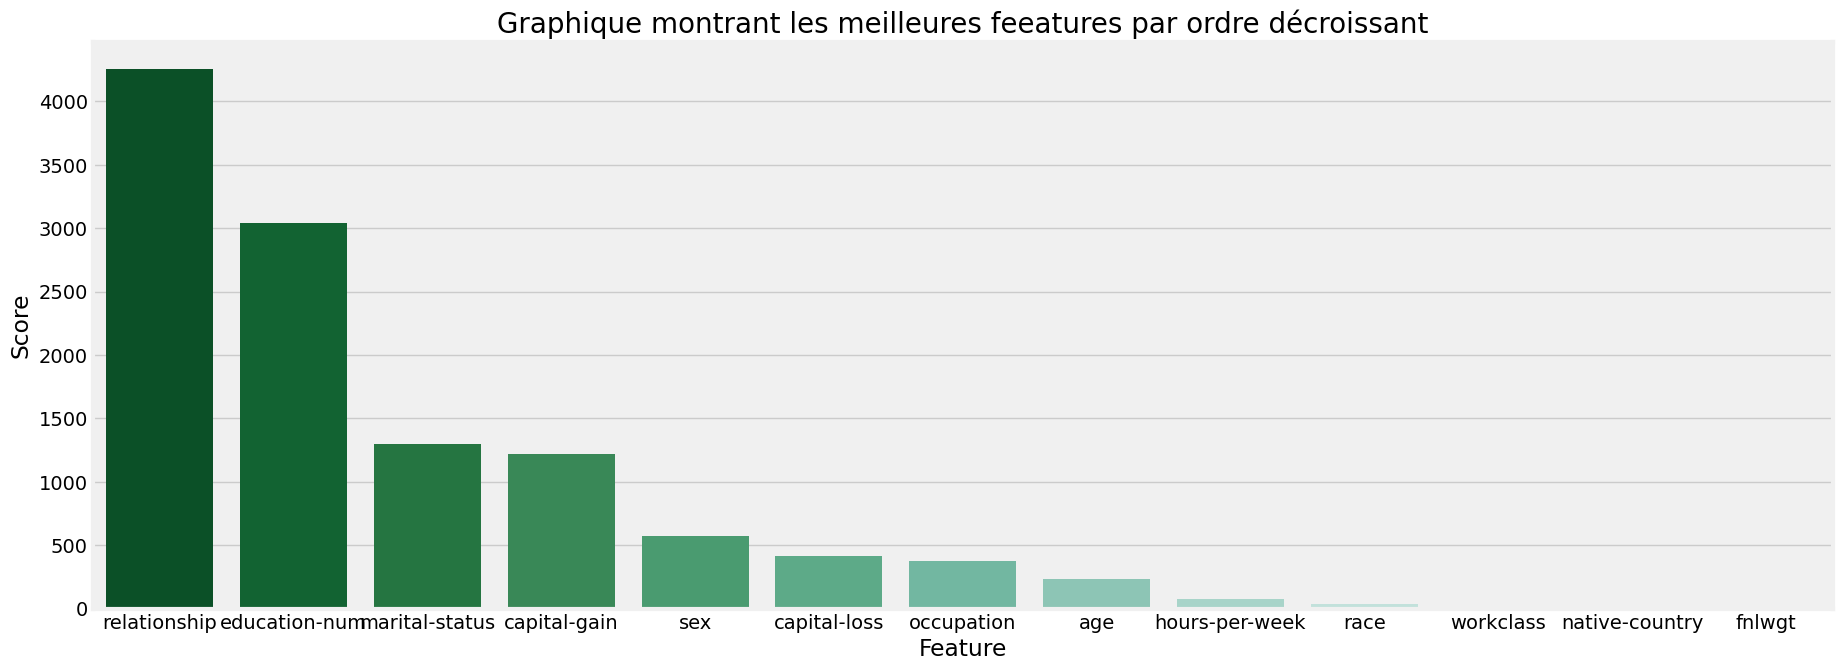

In [ ]:
# Visualiser la sélection de variables
scores = scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Graphique montrant les meilleures feeatures par ordre décroissant", size=20)
plt.show()

In [ ]:
df_train.columns


Index(['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', '>50K'],
      dtype='object')

In [ ]:
mask = select.get_support(indices=True)
feature_names = np.array(df_train.columns)

In [ ]:
mask

array([ 0,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [ ]:
print("Toutes les features:")
print(feature_names)

Toutes les features:
['age' 'workclass' 'fnlwgt' 'education-num' 'marital-status' 'occupation'
 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' '>50K']


In [ ]:
new_feature_names = df_train_select.columns[mask]
new_feature_names

Index(['age', 'education-num', 'marital-status', 'occupation', 'relationship',
       'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype='object')

In [ ]:
# Reconstruire les ensembles train et test
df_train_select_1 = df_train_select[new_feature_names]
df_test_select_1 = df_test[new_feature_names]

In [ ]:
cat_features

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')

In [ ]:
new_feature_names


Index(['age', 'education-num', 'marital-status', 'occupation', 'relationship',
       'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype='object')

In [ ]:
cat_select_features = [feature for feature in cat_features if feature in new_feature_names]
cat_select_features

['marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'education-num']

In [ ]:
cat_select_features = [feature for feature in cat_features if feature in new_feature_names]

cat_select_features = pd.Index(cat_select_features)
cat_select_features

Index(['marital-status', 'occupation', 'relationship', 'race', 'sex',
       'education-num'],
      dtype='object')

In [ ]:
cont_select_features = [feature for feature in cont_features if feature in new_feature_names]

cont_select_features = pd.Index(cont_select_features)
cont_select_features

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')

In [ ]:
df_train_select.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
42521,0.328767,4,0.077504,9,2,1,0,4,1,0.000000,0.0,0.397959,39
16121,0.219178,4,0.303172,8,4,12,1,4,1,0.097522,0.0,0.500000,39
4427,0.136986,4,0.026209,8,4,8,1,4,0,0.000000,0.0,0.397959,39
868,0.301370,4,0.110885,9,2,5,0,4,1,0.000000,0.0,0.500000,39
43827,0.013699,4,0.283229,6,4,9,3,4,0,0.000000,0.0,0.051020,39


In [ ]:
df_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
14299,0.260274,4,0.117779,9,2,7,0,1,1,0.0,0.0,0.500000,39,1
8056,0.205479,4,0.115037,4,2,3,0,4,1,0.0,0.0,0.397959,39,0
30671,0.547945,4,0.231102,8,0,14,1,4,1,0.0,0.0,0.448980,39,0
47035,0.424658,4,0.031712,8,0,11,1,4,1,0.0,0.0,0.397959,39,0
47248,0.082192,4,0.114681,8,2,12,0,4,1,0.0,0.0,0.500000,39,0


In [ ]:
df_test.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
14299,0.260274,4,0.117779,9,2,7,0,1,1,0.0,0.0,0.500000,39,1
8056,0.205479,4,0.115037,4,2,3,0,4,1,0.0,0.0,0.397959,39,0
30671,0.547945,4,0.231102,8,0,14,1,4,1,0.0,0.0,0.448980,39,0
47035,0.424658,4,0.031712,8,0,11,1,4,1,0.0,0.0,0.397959,39,0
47248,0.082192,4,0.114681,8,2,12,0,4,1,0.0,0.0,0.500000,39,0


In [ ]:
 ## suppression de colonnne >50K de df_test
df_test_select = df_test.drop('>50K', axis=1)
target_test = df_test['>50K']

In [ ]:
#(df_train, target_train, df_test, k=10):
#X_train_new, X_test_new, selected_features
# charger le module data_preprocessing
import importlib    
importlib.reload(data_preprocessing)
df_train_1, df_test_2, selected_features_1  = data_preprocessing.selectKbest(df_train_select, target_train,df_test_select
                                                                             , k=10)

In [ ]:
df_train_1.head()

,age,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
42521,0.328767,9,2,1,0,4,1,0.000000,0.0,0.397959
16121,0.219178,8,4,12,1,4,1,0.097522,0.0,0.500000
4427,0.136986,8,4,8,1,4,0,0.000000,0.0,0.397959
868,0.301370,9,2,5,0,4,1,0.000000,0.0,0.500000
43827,0.013699,6,4,9,3,4,0,0.000000,0.0,0.051020


In [ ]:
df_test_2.head()

,age,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week
14299,0.260274,9,2,7,0,1,1,0.0,0.0,0.500000
8056,0.205479,4,2,3,0,4,1,0.0,0.0,0.397959
30671,0.547945,8,0,14,1,4,1,0.0,0.0,0.448980
47035,0.424658,8,0,11,1,4,1,0.0,0.0,0.397959
47248,0.082192,8,2,12,0,4,1,0.0,0.0,0.500000


In [ ]:
selected_features_1

Index(['age', 'education-num', 'marital-status', 'occupation', 'relationship',
       'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week'],
      dtype='object')

In [ ]:
cont_select_features

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')